In [1]:
# Step 0: Import libraries and Dataset
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

# Define the column names
headers = ["#", "name", "Type 1", "Type 2", "Total", "HP", "Attack", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]

# Update the file path with the absolute path
file_path = "../Desktop/pokemon.csv"

# Load the dataset
dataset = pd.read_csv(file_path)
print(dataset.head())

   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [2]:
# Number of instances (rows)
num_instances = len(dataset)

# Number of attributes (columns)
num_attributes = len(dataset.columns)

# Name and type of each attribute
attribute_info = dataset.dtypes

print("1. Number of instances:", num_instances)
print("2. Number of attributes (columns):", num_attributes)
print("3. Name and type of each attribute:")
for column, data_type in attribute_info.items():
    print(f"- {column}: {data_type}")

1. Number of instances: 1124
2. Number of attributes (columns): 13
3. Name and type of each attribute:
- #: int64
- Name: object
- Type 1: object
- Type 2: object
- Total: int64
- HP: int64
- Attack: int64
- Defense: int64
- Sp. Atk: int64
- Sp. Def: int64
- Speed: int64
- Generation: int64
- Legendary: bool


In [3]:
# Step 1: Descriptive Statistics
# Preview data
dataset.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

In [4]:
# Convert " " to NaN
dataset.replace("", np.nan, inplace=True)
# Count missing values in each column and print results
missing_values = dataset.isnull().sum()
print("Number of missing values in each column:")
for column, count in missing_values.items():
    if count == 0:
        print(f"{column}: 0 (no missing values)")
    else:
        print(f"{column}: {count} missing values")

Number of missing values in each column:
#: 0 (no missing values)
Name: 0 (no missing values)
Type 1: 0 (no missing values)
Type 2: 518 missing values
Total: 0 (no missing values)
HP: 0 (no missing values)
Attack: 0 (no missing values)
Defense: 0 (no missing values)
Sp. Atk: 0 (no missing values)
Sp. Def: 0 (no missing values)
Speed: 0 (no missing values)
Generation: 0 (no missing values)
Legendary: 0 (no missing values)


In [5]:
# Dataset dimensions - (rows, columns)
print("Dataset dimensions:", dataset.shape)

Dataset dimensions: (1124, 13)


In [6]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124 entries, 0 to 1123
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           1124 non-null   int64 
 1   Name        1124 non-null   object
 2   Type 1      1124 non-null   object
 3   Type 2      606 non-null    object
 4   Total       1124 non-null   int64 
 5   HP          1124 non-null   int64 
 6   Attack      1124 non-null   int64 
 7   Defense     1124 non-null   int64 
 8   Sp. Atk     1124 non-null   int64 
 9   Sp. Def     1124 non-null   int64 
 10  Speed       1124 non-null   int64 
 11  Generation  1124 non-null   int64 
 12  Legendary   1124 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 106.6+ KB


In [7]:
# Statistical summary
dataset.describe().T

count        mean         std    min     25%    50%     75%  \
#           1124.0  511.692171  296.571828    1.0  258.75  502.5  764.25   
Total       1124.0  441.703737  120.550601  175.0  330.00  465.0  523.50   
HP          1124.0   71.011566   26.550224    1.0   51.75   70.0   85.00   
Attack      1124.0   80.434164   32.146899    5.0   55.00   77.0  100.00   
Defense     1124.0   74.653025   30.421478    5.0   52.00   70.0   90.00   
Sp. Atk     1124.0   73.572954   32.839921   10.0   50.00   65.0   95.00   
Sp. Def     1124.0   72.526690   27.438723   20.0   50.00   70.0   90.00   
Speed       1124.0   69.505338   30.030572    5.0   45.00   66.0   90.00   
Generation  1124.0    4.712633    2.631100    1.0    3.00    5.0    7.00   

               max  
#           1031.0  
Total        780.0  
HP           255.0  
Attack       190.0  
Defense      230.0  
Sp. Atk      194.0  
Sp. Def      230.0  
Speed        200.0  
Generation     9.0

In [8]:
# Count of null values
dataset.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        518
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [9]:
dataset

#                   Name  Type 1   Type 2  Total   HP  Attack  \
0        1              Bulbasaur   Grass   Poison    318   45      49   
1        2                Ivysaur   Grass   Poison    405   60      62   
2        3               Venusaur   Grass   Poison    525   80      82   
3        3  VenusaurMega Venusaur   Grass   Poison    625   80     100   
4        4             Charmander    Fire      NaN    309   39      52   
...    ...                    ...     ...      ...    ...  ...     ...   
1119  1027            Pestalation  Flying   Poison    666  111     111   
1120  1028                Revylon  Ground     Fire    666  109      73   
1121  1029               Leoseace   Water     Dark    666  157     113   
1122  1030                Lamentu    Fire  Psychic    666  113      71   
1123  1031            Endram-Odai  Dragon    Fairy    736  157      73   

      Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0          49       65       65     45           1      False  
1          63       80       80     60           1      False  
2          83      100      100     80           1      False  
3         123      122      120     80           1      False  
4          43       60       50     65           1      False  
...       ...      ...      ...    ...         ...        ...  
1119      111      111      111    111           9      False  
1120      101      143      109    131           9      False  
1121       97      101       71    127           9      False  
1122       79      149      117    137           9      False  
1123      107      173      137     89           9      False  

[1124 rows x 13 columns]

In [10]:
# Observations
1. There are a total of 1124 rows or records in our data
2. There is a total of 13 columns or features in our dataset with our
features being of type int or object or bool datatype
3. The only feature that has missing data is type 2 which means some pokemons don't 
have a type 2 to themselves like the basic typ of pokemon
4. The only missing values replaced by NaN is in the type 2 column
5. In the Legendary column or the column of the predicted values is of 
boolean type which can either be True or False

SyntaxError: unterminated string literal (detected at line 5) (2534817561.py, line 5)

<Axes: xlabel='Legendary', ylabel='count'>

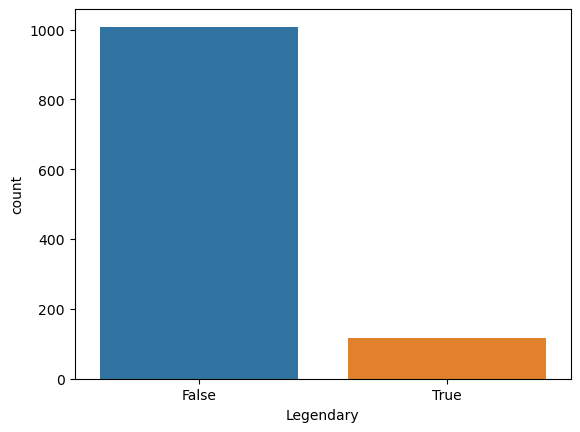

In [11]:
# Step 2: Data Visualization
# Outcome countplot
sns.countplot(x='Legendary', data=dataset)

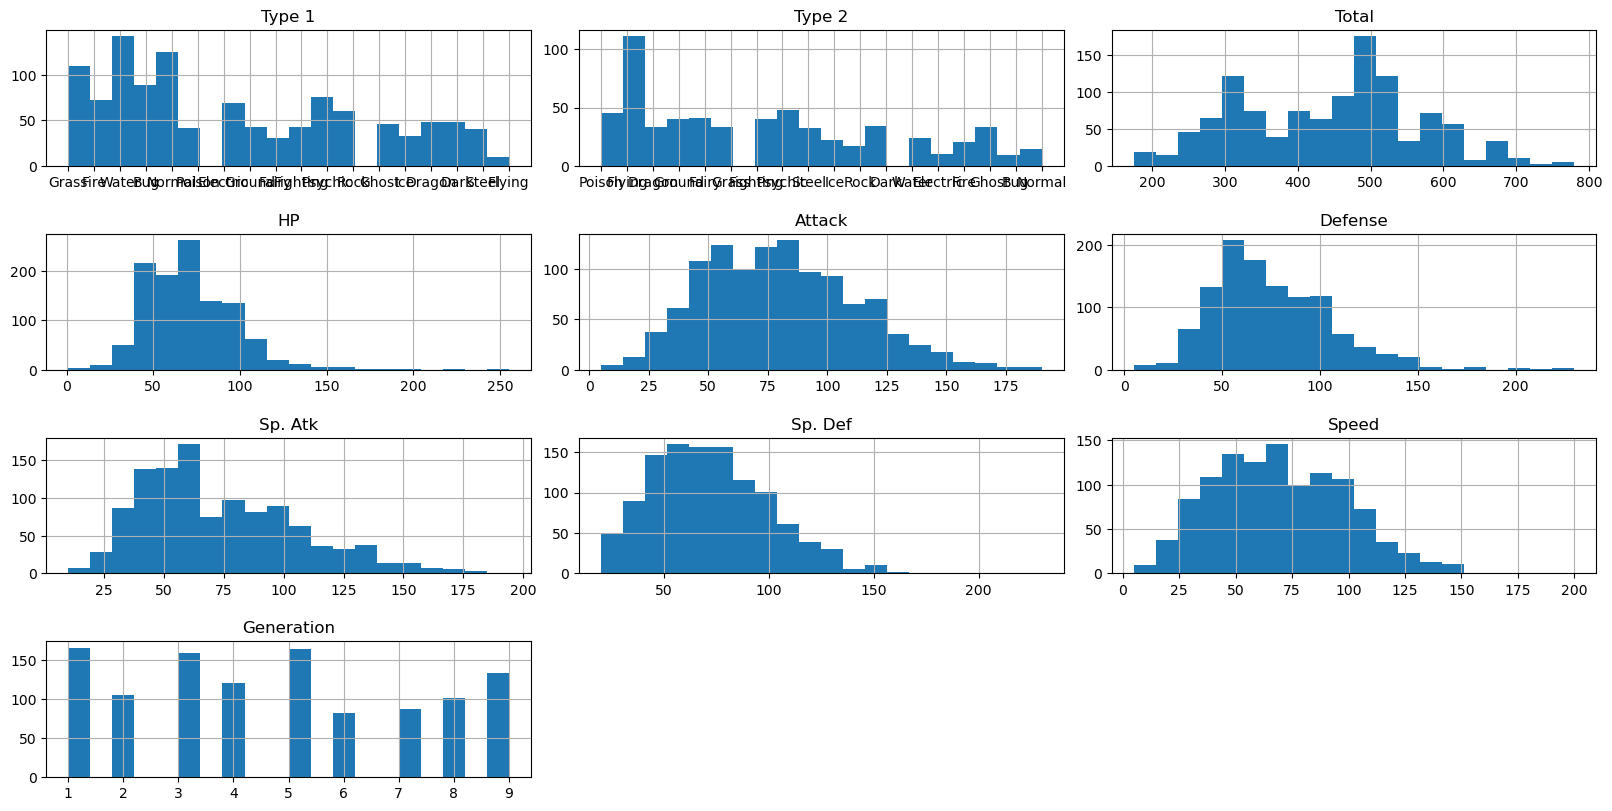

In [12]:
# Histograms for numeric columns
import itertools

col = dataset.columns[2:-1]
plt.figure(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length // 2) + 1, 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    dataset[i].hist(bins=20)
    plt.title(i)

plt.show()


array([[<Axes: xlabel='Total', ylabel='Total'>,
        <Axes: xlabel='HP', ylabel='Total'>,
        <Axes: xlabel='Attack', ylabel='Total'>,
        <Axes: xlabel='Defense', ylabel='Total'>,
        <Axes: xlabel='Sp. Atk', ylabel='Total'>,
        <Axes: xlabel='Sp. Def', ylabel='Total'>,
        <Axes: xlabel='Speed', ylabel='Total'>,
        <Axes: xlabel='Generation', ylabel='Total'>],
       [<Axes: xlabel='Total', ylabel='HP'>,
        <Axes: xlabel='HP', ylabel='HP'>,
        <Axes: xlabel='Attack', ylabel='HP'>,
        <Axes: xlabel='Defense', ylabel='HP'>,
        <Axes: xlabel='Sp. Atk', ylabel='HP'>,
        <Axes: xlabel='Sp. Def', ylabel='HP'>,
        <Axes: xlabel='Speed', ylabel='HP'>,
        <Axes: xlabel='Generation', ylabel='HP'>],
       [<Axes: xlabel='Total', ylabel='Attack'>,
        <Axes: xlabel='HP', ylabel='Attack'>,
        <Axes: xlabel='Attack', ylabel='Attack'>,
        <Axes: xlabel='Defense', ylabel='Attack'>,
        <Axes: xlabel='Sp. Atk', ylabel=

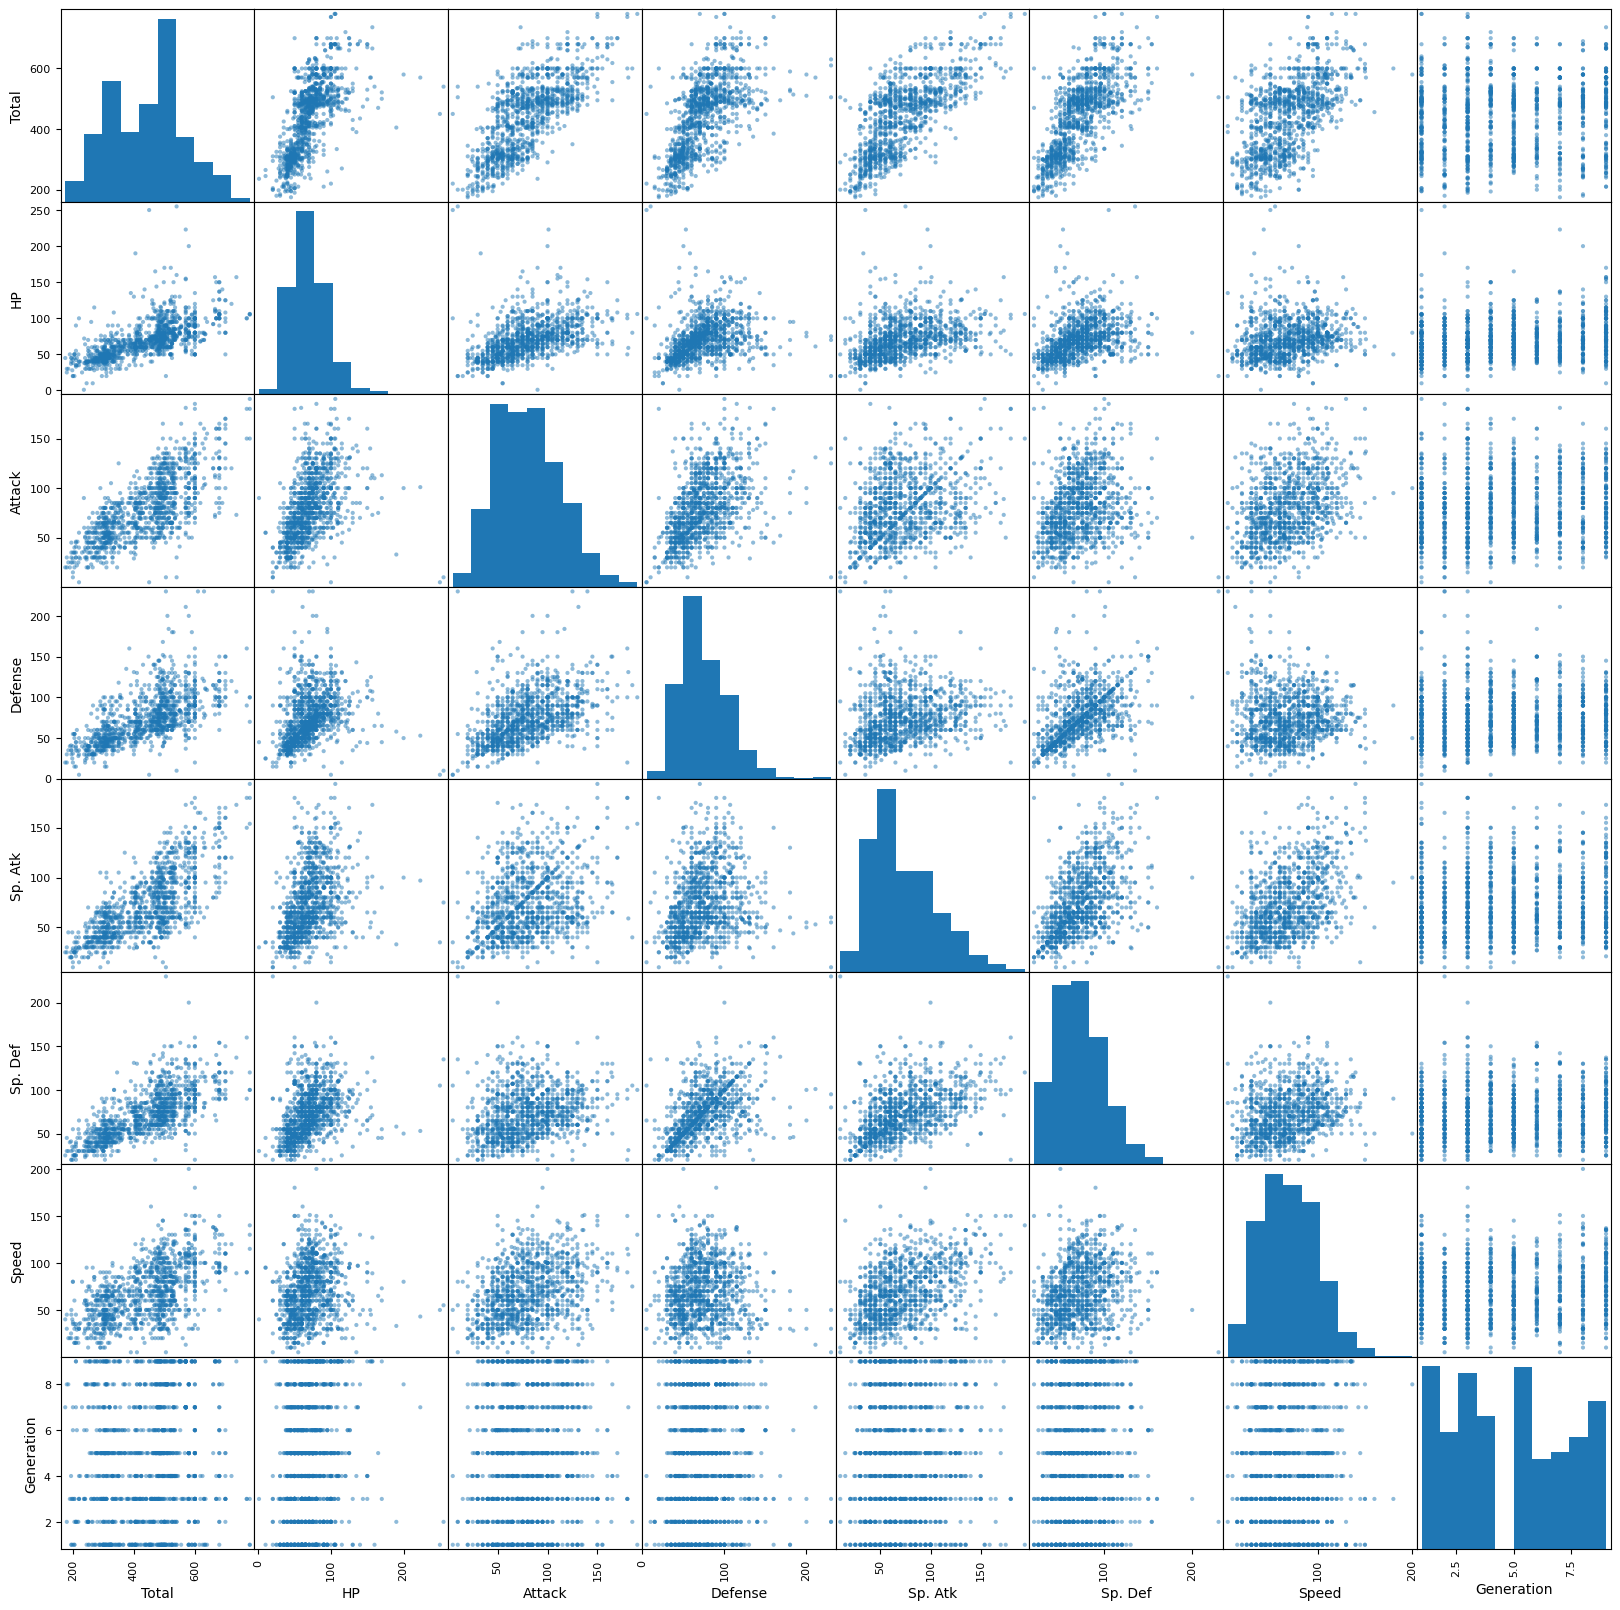

In [13]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix

cols_for_scatter = dataset.columns[2:-1]
scatter_matrix(dataset[cols_for_scatter], figsize=(20, 20))

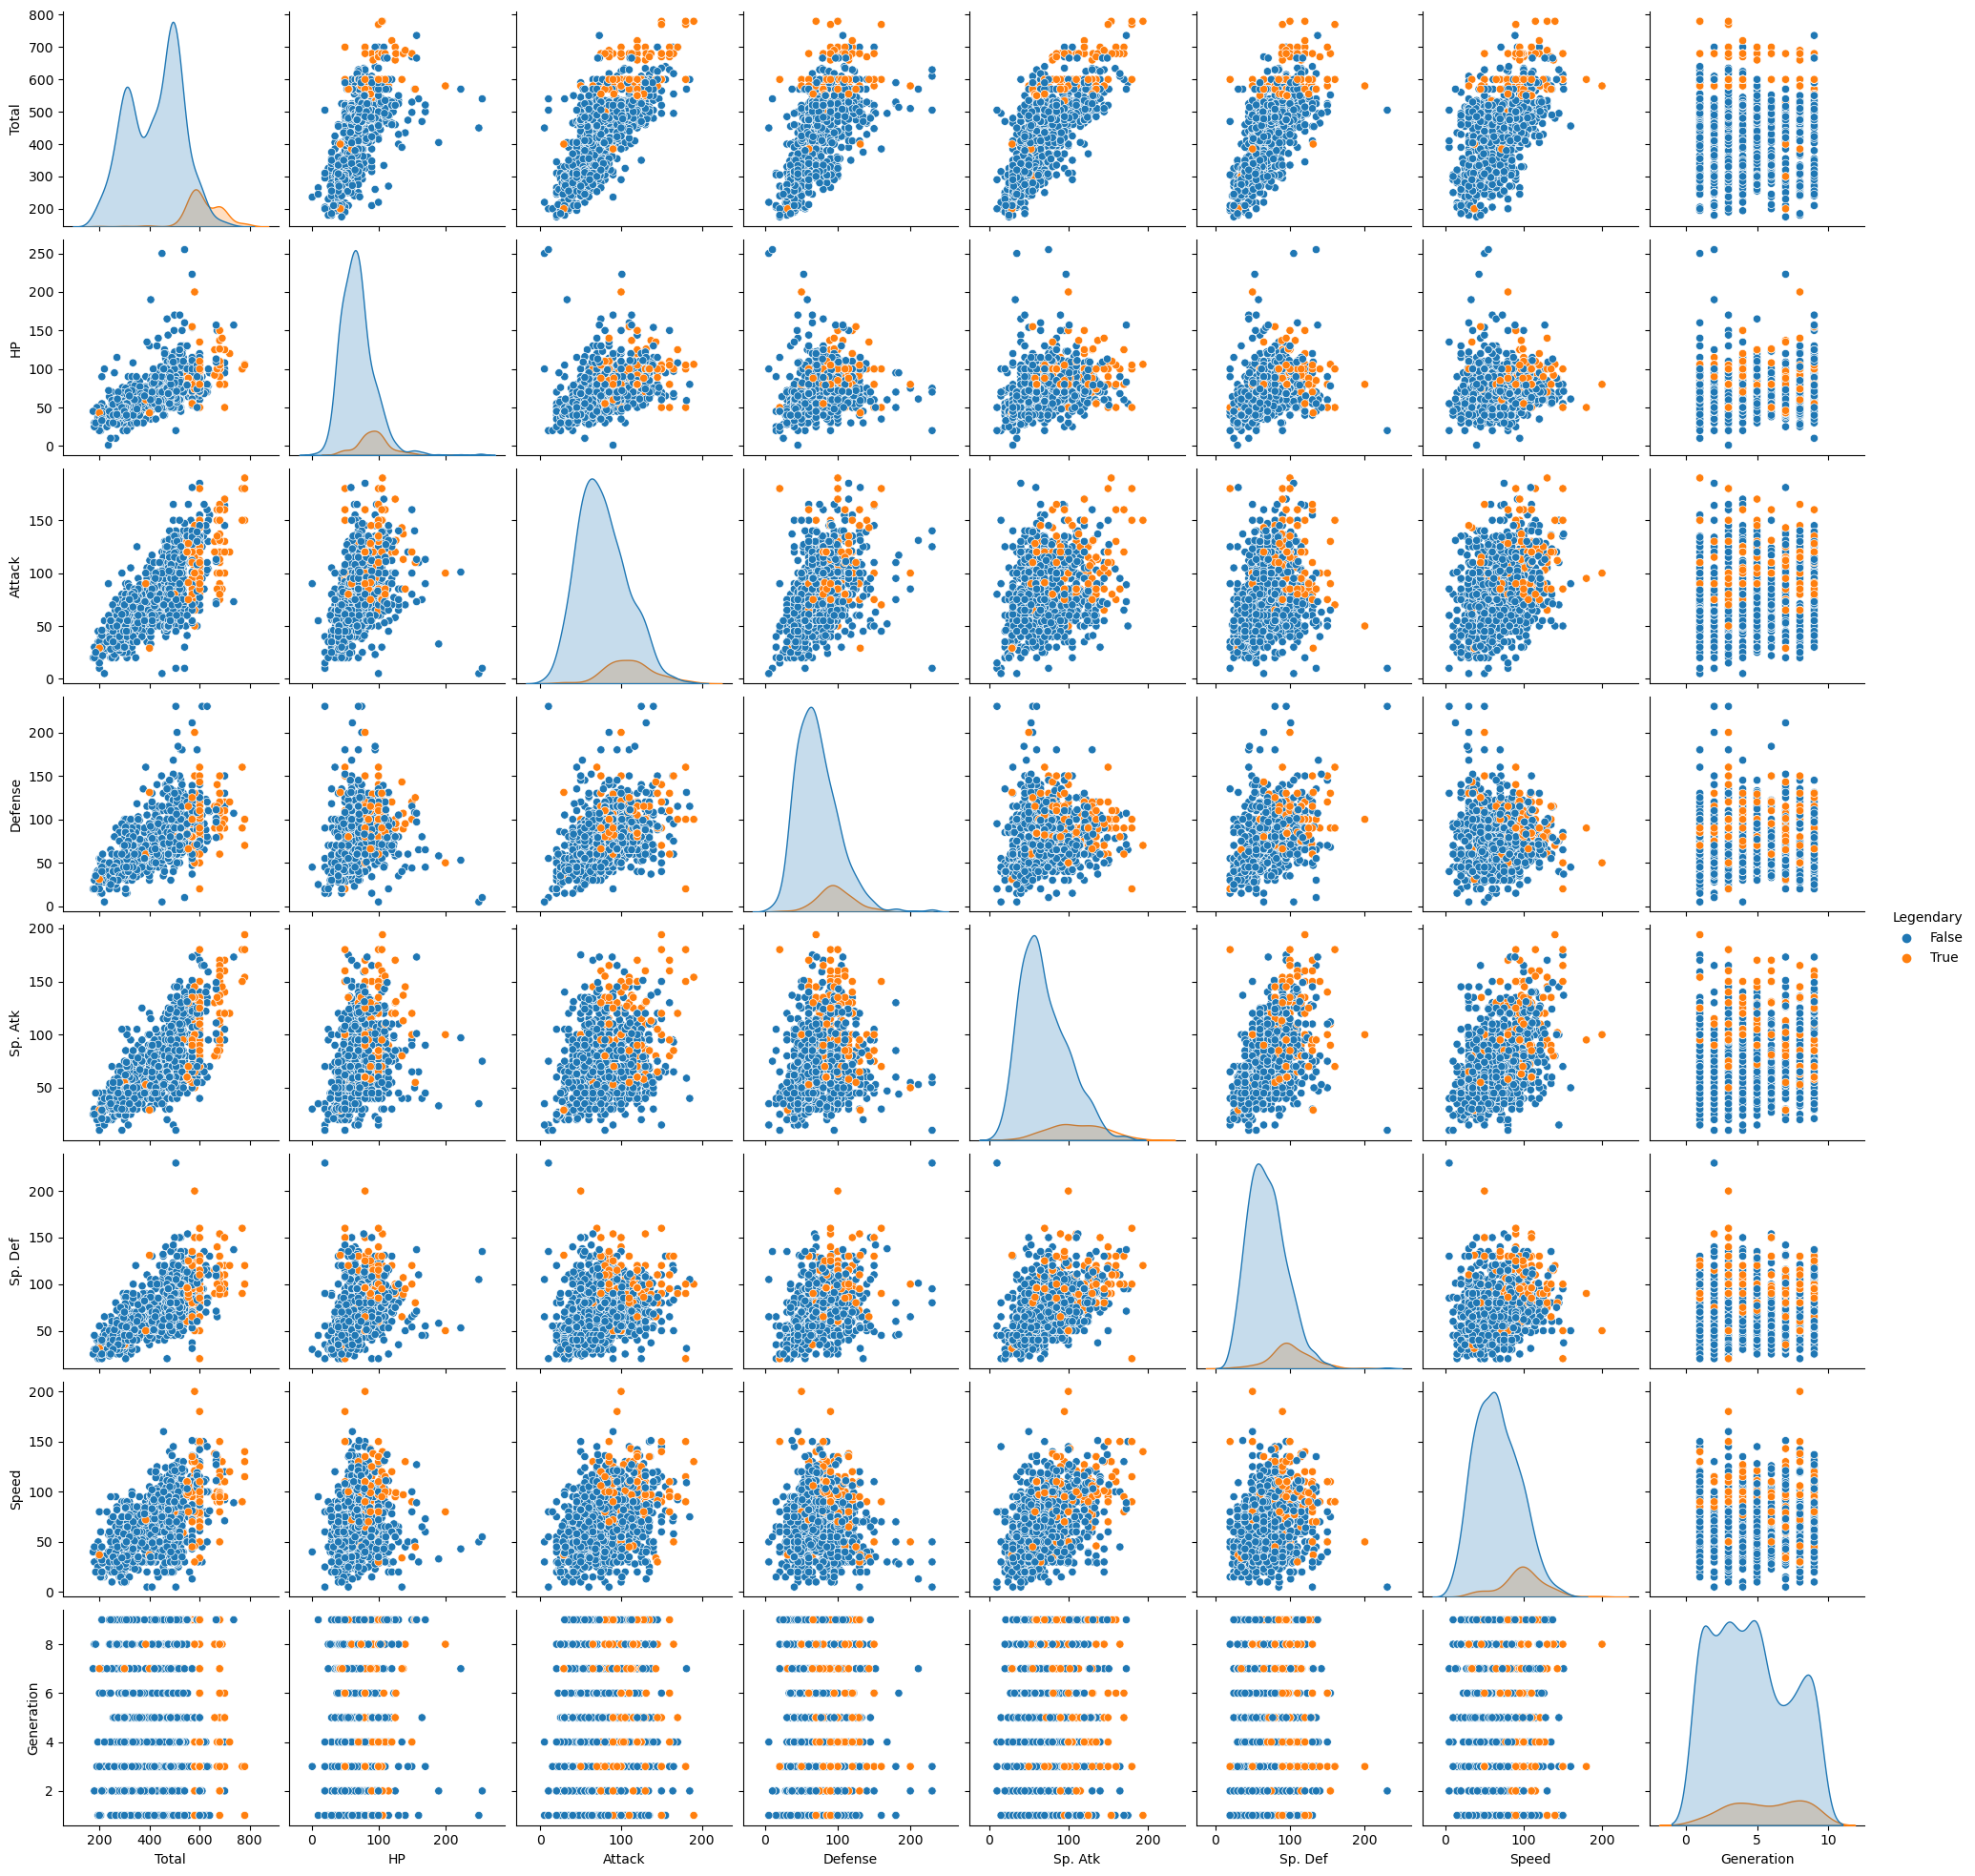

In [14]:

# Pairplot
cols_for_pairplot = dataset.columns[2:]
sns.pairplot(data=dataset[cols_for_pairplot], hue='Legendary')
plt.show()


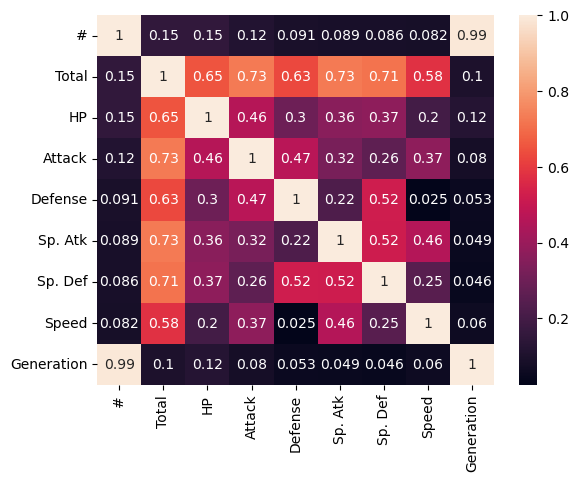

In [15]:
# Heatmap
numeric_columns = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()
 

In [16]:
# Step 3: Data Preprocessing

# Replacing zero values with NaN
dataset[["#", "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]] = dataset[["#", "Name", "Type 1", "Type 2", "Total", "HP", "Attack", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].replace(0, np.NaN)


In [17]:
# Count of NaN
dataset.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        518
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [18]:
# Replace NaN with mean values for specific columns
columns_to_fill = ["#", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]

for column in columns_to_fill:
    dataset[column].fillna(dataset[column].mean(), inplace=True)

In [19]:
# Statistical summary
dataset.describe().T

count        mean         std    min     25%    50%     75%  \
#           1124.0  511.692171  296.571828    1.0  258.75  502.5  764.25   
Total       1124.0  441.703737  120.550601  175.0  330.00  465.0  523.50   
HP          1124.0   71.011566   26.550224    1.0   51.75   70.0   85.00   
Attack      1124.0   80.434164   32.146899    5.0   55.00   77.0  100.00   
Defense     1124.0   74.653025   30.421478    5.0   52.00   70.0   90.00   
Sp. Atk     1124.0   73.572954   32.839921   10.0   50.00   65.0   95.00   
Sp. Def     1124.0   72.526690   27.438723   20.0   50.00   70.0   90.00   
Speed       1124.0   69.505338   30.030572    5.0   45.00   66.0   90.00   
Generation  1124.0    4.712633    2.631100    1.0    3.00    5.0    7.00   

               max  
#           1031.0  
Total        780.0  
HP           255.0  
Attack       190.0  
Defense      230.0  
Sp. Atk      194.0  
Sp. Def      230.0  
Speed        200.0  
Generation     9.0

In [20]:
# List of numeric columns to be scaled
numeric_columns = ["#", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]

# Extract only the numeric columns from the dataset
numeric_data = dataset[numeric_columns]

# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = pd.DataFrame(sc.fit_transform(numeric_data), columns=numeric_columns)

# Combine scaled numeric data with non-numeric columns
dataset_scaled = pd.concat([dataset.drop(columns=numeric_columns), dataset_scaled], axis=1)


In [21]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [22]:
# Feature selection
numeric_columns_pokemon = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]

numeric_data_pokemon = dataset_scaled[numeric_columns_pokemon]

selected_features_pokemon = ["Total", "HP", "Attack", "Sp. Atk"]

# Selecting features - [Total, HP, Attack, Sp. Atk]
X = numeric_data_pokemon[selected_features_pokemon].values
Y = dataset_scaled["Legendary"].values


In [23]:
# Splitting X and Y for Pokemon dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42, stratify=dataset_scaled['Legendary']
)

In [24]:

# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (899, 4)
X_test shape: (225, 4)
Y_train shape: (899,)
Y_test shape: (225,)


In [25]:
# Step 4: Data Modelling
# Logistic Regression Algorithm
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [26]:
# K nearest neighbors Algorithm
X_axis = list(range(1, 31))
acc = []

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc.append(accuracy_score(prediction, Y_test))

max_acc_index = acc.index(max(acc))
best_n_neighbors = X_axis[max_acc_index]
print('Highest accuracy value:', max(acc))
print('Corresponding n_neighbors value:', best_n_neighbors)

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric='minkowski', p=2)
knn.fit(X_train, Y_train)

Highest accuracy value: 0.9466666666666667
Corresponding n_neighbors value: 13


KNeighborsClassifier(n_neighbors=13)

In [27]:

# Support Vector Classifier Algorithm
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [28]:
# Naive Bayes Algorithm
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [29]:
# Decision tree Algorithm
dectree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [30]:
# Random forest Algorithm
ranfor = RandomForestClassifier(n_estimators=11, criterion='entropy', random_state=42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [32]:
# Making predictions on the test dataset
# Predictions on the training set
# Making predictions on the test dataset
Y_pred_logreg_train = logreg.predict(X_train)
Y_pred_logreg_test = logreg.predict(X_test)

Y_pred_knn_train = knn.predict(X_train)
Y_pred_knn_test = knn.predict(X_test)

Y_pred_svc_train = svc.predict(X_train)
Y_pred_svc_test = svc.predict(X_test)

Y_pred_nb_train = nb.predict(X_train)
Y_pred_nb_test = nb.predict(X_test)

Y_pred_dectree_train = dectree.predict(X_train)
Y_pred_dectree_test = dectree.predict(X_test)

Y_pred_ranfor_train = ranfor.predict(X_train)
Y_pred_ranfor_test = ranfor.predict(X_test)


In [37]:
print("Y_pred_logreg shape:", Y_pred_logreg_test.shape)


Y_pred_logreg shape: (225,)


In [ ]:
# Step 5: Model Evaluation
# Model evaluation metrics
logreg_train_accuracy = accuracy_score(Y_train, Y_pred_logreg_train)
logreg_test_accuracy = accuracy_score(Y_test, Y_pred_logreg_test)
logreg_train_precision = precision_score(Y_train, Y_pred_logreg_train, average='binary')
logreg_test_precision = precision_score(Y_test, Y_pred_logreg_test, average='binary')
logreg_train_recall = recall_score(Y_train, Y_pred_logreg_train, average='binary')
logreg_test_recall = recall_score(Y_test, Y_pred_logreg_test, average='binary')
logreg_train_f1 = f1_score(Y_train, Y_pred_logreg_train, average='binary')
logreg_test_f1 = f1_score(Y_test, Y_pred_logreg_test, average='binary')
logreg_class_report = classification_report(Y_test,Y_pred_logreg_test)                    
# Display the metrics
print("Logistic Regression Training Accuracy:", logreg_train_accuracy)
print("Logistic Regression Testing Accuracy:", logreg_test_accuracy)
print("Logistic Regression Training Precision:", logreg_train_precision)
print("Logistic Regression Testing Precision:", logreg_test_precision)
print("Logistic Regression Training Recall:", logreg_train_recall)
print("Logistic Regression Testing Recall:", logreg_test_recall)
print("Logistic Regression Training F1 Score:", logreg_train_f1)
print("Logistic Regression Testing F1 Score:", logreg_test_f1)
print("Logistic Regression Classification Report:\n", logreg_class_report)
log_reg_results = {
    'Model': 'Logistic Regression',
    'Train Accuracy': logreg_train_accuracy,
    'Test Accuracy': logreg_test_accuracy,
    'Train Precision': logreg_train_precision,
    'Test Precision': logreg_test_precision,
    'Train Recall': logreg_train_recall,
    'Test Recall': logreg_test_recall,
    'Train F1 Score': logreg_train_f1,
    'Test F1 Score': logreg_test_f1
}



Logistic Regression Training Accuracy: 0.9187986651835373
Logistic Regression Testing Accuracy: 0.9333333333333333
Logistic Regression Training Precision: 0.7941176470588235
Logistic Regression Testing Precision: 1.0
Logistic Regression Training Recall: 0.2903225806451613
Logistic Regression Testing Recall: 0.34782608695652173
Logistic Regression Training F1 Score: 0.4251968503937008
Logistic Regression Testing F1 Score: 0.5161290322580645
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.93      1.00      0.96       202
        True       1.00      0.35      0.52        23

    accuracy                           0.93       225
   macro avg       0.97      0.67      0.74       225
weighted avg       0.94      0.93      0.92       225



In [ ]:
# K-Nearest Neighbors (KNN)
knn_train_accuracy = accuracy_score(Y_train, Y_pred_knn_train)
knn_test_accuracy = accuracy_score(Y_test, Y_pred_knn_test)
knn_train_precision = precision_score(Y_train, Y_pred_knn_train, average='binary')
knn_test_precision = precision_score(Y_test, Y_pred_knn_test, average='binary')
knn_train_recall = recall_score(Y_train, Y_pred_knn_train, average='binary')
knn_test_recall = recall_score(Y_test, Y_pred_knn_test, average='binary')
knn_train_f1 = f1_score(Y_train, Y_pred_knn_train, average='binary')
knn_test_f1 = f1_score(Y_test, Y_pred_knn_test, average='binary')
knn_class_report = classification_report(Y_test,Y_pred_knn_test)
# Display the metrics for KNN
print("KNN Training Accuracy:", knn_train_accuracy)
print("KNN Testing Accuracy:", knn_test_accuracy)
print("KNN Training Precision:", knn_train_precision)
print("KNN Testing Precision:", knn_test_precision)
print("KNN Training Recall:", knn_train_recall)
print("KNN Testing Recall:", knn_test_recall)
print("KNN Training F1 Score:", knn_train_f1)
print("KNN Testing F1 Score:", knn_test_f1)
print("KNN Classification Report:\n", knn_class_report)
print()
knn_results = {
    'Model': 'KNN',
    'Train Accuracy': knn_train_accuracy,
    'Test Accuracy': knn_test_accuracy,
    'Train Precision': knn_train_precision,
    'Test Precision': knn_test_precision,
    'Train Recall': knn_train_recall,
    'Test Recall': knn_test_recall,
    'Train F1 Score': knn_train_f1,
    'Test F1 Score': knn_test_f1
}

KNN Training Accuracy: 0.9365962180200222
KNN Testing Accuracy: 0.9466666666666667
KNN Training Precision: 0.7571428571428571
KNN Testing Precision: 0.7619047619047619
KNN Training Recall: 0.5698924731182796
KNN Testing Recall: 0.6956521739130435
KNN Training F1 Score: 0.6503067484662578
KNN Testing F1 Score: 0.7272727272727272
KNN Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.98      0.97       202
        True       0.76      0.70      0.73        23

    accuracy                           0.95       225
   macro avg       0.86      0.84      0.85       225
weighted avg       0.94      0.95      0.95       225




In [ ]:
# Naive Bayes (NB)
nb_train_accuracy = accuracy_score(Y_train, Y_pred_nb_train)
nb_test_accuracy = accuracy_score(Y_test, Y_pred_nb_test)
nb_train_precision = precision_score(Y_train, Y_pred_nb_train, average='binary')
nb_test_precision = precision_score(Y_test, Y_pred_nb_test, average='binary')
nb_train_recall = recall_score(Y_train, Y_pred_nb_train, average='binary')
nb_test_recall = recall_score(Y_test, Y_pred_nb_test, average='binary')
nb_train_f1 = f1_score(Y_train, Y_pred_nb_train, average='binary')
nb_test_f1 = f1_score(Y_test, Y_pred_nb_test, average='binary')
nb_class_report = classification_report(Y_test,Y_pred_nb_test)
# Display the metrics for Naive Bayes
print("Naive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Testing Accuracy:", nb_test_accuracy)
print("Naive Bayes Training Precision:", nb_train_precision)
print("Naive Bayes Testing Precision:", nb_test_precision)
print("Naive Bayes Training Recall:", nb_train_recall)
print("Naive Bayes Testing Recall:", nb_test_recall)
print("Naive Bayes Training F1 Score:", nb_train_f1)
print("Naive Bayes Testing F1 Score:", nb_test_f1)
print("Naive Bayes Classification Report:\n", nb_class_report)
print()
nb_results = {
    'Model': 'Naive Bayes',
    'Train Accuracy': nb_train_accuracy,
    'Test Accuracy': nb_test_accuracy,
    'Train Precision': nb_train_precision,
    'Test Precision': nb_test_precision,
    'Train Recall': nb_train_recall,
    'Test Recall': nb_test_recall,
    'Train F1 Score': nb_train_f1,
    'Test F1 Score': nb_test_f1
}


Naive Bayes Training Accuracy: 0.8865406006674083
Naive Bayes Testing Accuracy: 0.8888888888888888
Naive Bayes Training Precision: 0.4666666666666667
Naive Bayes Testing Precision: 0.4722222222222222
Naive Bayes Training Recall: 0.6774193548387096
Naive Bayes Testing Recall: 0.7391304347826086
Naive Bayes Training F1 Score: 0.5526315789473684
Naive Bayes Testing F1 Score: 0.5762711864406781
Naive Bayes Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.91      0.94       202
        True       0.47      0.74      0.58        23

    accuracy                           0.89       225
   macro avg       0.72      0.82      0.76       225
weighted avg       0.92      0.89      0.90       225




In [ ]:
# Decision Tree
dectree_train_accuracy = accuracy_score(Y_train, Y_pred_dectree_train)
dectree_test_accuracy = accuracy_score(Y_test, Y_pred_dectree_test)
dectree_train_precision = precision_score(Y_train, Y_pred_dectree_train, average='binary')
dectree_test_precision = precision_score(Y_test, Y_pred_dectree_test, average='binary')
dectree_train_recall = recall_score(Y_train, Y_pred_dectree_train, average='binary')
dectree_test_recall = recall_score(Y_test, Y_pred_dectree_test, average='binary')
dectree_train_f1 = f1_score(Y_train, Y_pred_dectree_train, average='binary')
dectree_test_f1 = f1_score(Y_test, Y_pred_dectree_test, average='binary')
dt_class_report = classification_report(Y_test,Y_pred_dectree_test)

# Display the metrics for Decision Tree
print("Decision Tree Training Accuracy:", dectree_train_accuracy)
print("Decision Tree Testing Accuracy:", dectree_test_accuracy)
print("Decision Tree Training Precision:", dectree_train_precision)
print("Decision Tree Testing Precision:", dectree_test_precision)
print("Decision Tree Training Recall:", dectree_train_recall)
print("Decision Tree Testing Recall:", dectree_test_recall)
print("Decision Tree Training F1 Score:", dectree_train_f1)
print("Decision Tree Testing F1 Score:", dectree_test_f1)
print("Decision Tree  Classification Report:\n", dt_class_report)
print()
dt_results = {
    'Model': 'Decision Tree',
    'Train Accuracy': dectree_train_accuracy,
    'Test Accuracy': dectree_test_accuracy,
    'Classification Report': dt_class_report
}

Decision Tree Training Accuracy: 0.9988876529477196
Decision Tree Testing Accuracy: 0.9155555555555556
Decision Tree Training Precision: 0.9893617021276596
Decision Tree Testing Precision: 0.5666666666666667
Decision Tree Training Recall: 1.0
Decision Tree Testing Recall: 0.7391304347826086
Decision Tree Training F1 Score: 0.9946524064171123
Decision Tree Testing F1 Score: 0.6415094339622641
Decision Tree  Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.94      0.95       202
        True       0.57      0.74      0.64        23

    accuracy                           0.92       225
   macro avg       0.77      0.84      0.80       225
weighted avg       0.93      0.92      0.92       225




In [ ]:
# Random Forest
ranfor_train_accuracy = accuracy_score(Y_train, Y_pred_ranfor_train)
ranfor_test_accuracy = accuracy_score(Y_test, Y_pred_ranfor_test)
ranfor_train_precision = precision_score(Y_train, Y_pred_ranfor_train, average='binary')
ranfor_test_precision = precision_score(Y_test, Y_pred_ranfor_test, average='binary')
ranfor_train_recall = recall_score(Y_train, Y_pred_ranfor_train, average='binary')
ranfor_test_recall = recall_score(Y_test, Y_pred_ranfor_test, average='binary')
ranfor_train_f1 = f1_score(Y_train, Y_pred_ranfor_train, average='binary')
ranfor_test_f1 = f1_score(Y_test, Y_pred_ranfor_test, average='binary')
ranfor_class_report = classification_report(Y_test, Y_pred_ranfor_test)

# Display the metrics for Random Forest
print("Random Forest Training Accuracy:", ranfor_train_accuracy)
print("Random Forest Testing Accuracy:", ranfor_test_accuracy)
print("Random Forest Training Precision:", ranfor_train_precision)
print("Random Forest Testing Precision:", ranfor_test_precision)
print("Random Forest Training Recall:", ranfor_train_recall)
print("Random Forest Testing Recall:", ranfor_test_recall)
print("Random Forest Training F1 Score:", ranfor_train_f1)
print("Random Forest Testing F1 Score:", ranfor_test_f1)
print("Random Forest Classifier Classification Report:\n", ranfor_class_report)
rf_results = {
    'Model': 'Decision Tree',
    'Train Accuracy': ranfor_train_accuracy,
    'Test Accuracy': ranfor_test_accuracy,
    'Classification Report':ranfor_class_report
}

Random Forest Training Accuracy: 0.9977753058954394
Random Forest Testing Accuracy: 0.9377777777777778
Random Forest Training Precision: 0.989247311827957
Random Forest Testing Precision: 0.6666666666666666
Random Forest Training Recall: 0.989247311827957
Random Forest Testing Recall: 0.782608695652174
Random Forest Training F1 Score: 0.989247311827957
Random Forest Testing F1 Score: 0.72
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.96      0.96       202
        True       0.67      0.78      0.72        23

    accuracy                           0.94       225
   macro avg       0.82      0.87      0.84       225
weighted avg       0.94      0.94      0.94       225



In [ ]:
# Support Vector Classifier
svc_train_accuracy = accuracy_score(Y_train, Y_pred_svc_train)
svc_test_accuracy = accuracy_score(Y_test, Y_pred_svc_test)
svc_train_precision = precision_score(Y_train, Y_pred_svc_train, average='binary')
svc_test_precision = precision_score(Y_test, Y_pred_svc_test, average='binary')
svc_train_recall = recall_score(Y_train, Y_pred_svc_train, average='binary')
svc_test_recall = recall_score(Y_test, Y_pred_svc_test, average='binary')
svc_train_f1 = f1_score(Y_train, Y_pred_svc_train, average='binary')
svc_test_f1 = f1_score(Y_test, Y_pred_svc_test, average='binary')
svc_class_report = classification_report(Y_test, Y_pred_svc_test)
print("\nSupport Vector Classifier Training Accuracy:", svc_train_accuracy)
print("Support Vector Classifier Testing Accuracy:", svc_test_accuracy)
print("Support Vector Classifier Training Precision:", svc_train_precision)
print("Support Vector Classifier Testing Precision:", svc_test_precision)
print("Support Vector Classifier Training Recall:", svc_train_recall)
print("Support Vector Classifier Testing Recall:", svc_test_recall)
print("Support Vector Classifier Training F1 Score:", svc_train_f1)
print("Support Vector Classifier Testing F1 Score:", svc_test_f1)
print("Support Vector Classifier Classification Report:\n", svc_class_report)
svc_results = {
    'Model': 'Decision Tree',
    'Train Accuracy': svc_train_accuracy,
    'Test Accuracy': svc_test_accuracy,
    'Classification Report':svc_class_report
}



Support Vector Classifier Training Accuracy: 0.9121245828698554
Support Vector Classifier Testing Accuracy: 0.9244444444444444
Support Vector Classifier Training Precision: 0.7916666666666666
Support Vector Classifier Testing Precision: 1.0
Support Vector Classifier Training Recall: 0.20430107526881722
Support Vector Classifier Testing Recall: 0.2608695652173913
Support Vector Classifier Training F1 Score: 0.3247863247863248
Support Vector Classifier Testing F1 Score: 0.41379310344827586
Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96       202
        True       1.00      0.26      0.41        23

    accuracy                           0.92       225
   macro avg       0.96      0.63      0.69       225
weighted avg       0.93      0.92      0.90       225



In [132]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Assuming log_reg_results, rf_results, dt_results, svc_results, nb_results, and knn_results are dictionaries for each model

# List of dictionaries for each model
models_results = [log_reg_results, rf_results, dt_results, svc_results, nb_results, knn_results]  # Add more dictionaries as needed

# Create an empty list to store DataFrames for the 6 models
models_dfs = []

# Pad the dictionaries and create DataFrames
for model_name, results_dict in zip(["log_reg", "rf", "dt", "svc", "nb", "knn"], models_results):
    results_padded = pad_dict(results_dict, max_length)
    model_df = pd.DataFrame(results_padded)
    
    # Remove NaN values
    model_df = model_df.dropna()

    # Drop duplicates based on Model name
    model_df = model_df.drop_duplicates(subset='sModel')
    
    models_dfs.append(model_df)

# Concatenate DataFrames for the 6 models
df_models = pd.concat(models_dfs, axis=0).reset_index(drop=True)

# Sort the DataFrame based on Test Accuracy
df_models_sorted = df_models.sort_values(by='Test Accuracy', ascending=False).reset_index(drop=True)

# Display only specific columns
selected_columns = ['Model', 'Train Accuracy', 'Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall', 'Train F1 Score', 'Test F1 Score']
table = tabulate(df_models_sorted[selected_columns], headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table
print(table)


╒═════════════════════╤══════════════════╤═════════════════╤═══════════════════╤══════════════════╤════════════════╤═══════════════╤══════════════════╤═════════════════╕
│ Model               │   Train Accuracy │   Test Accuracy │   Train Precision │   Test Precision │   Train Recall │   Test Recall │   Train F1 Score │   Test F1 Score │
╞═════════════════════╪══════════════════╪═════════════════╪═══════════════════╪══════════════════╪════════════════╪═══════════════╪══════════════════╪═════════════════╡
│ KNN                 │         0.936596 │        0.946667 │          0.757143 │         0.761905 │       0.569892 │      0.695652 │         0.650307 │        0.727273 │
├─────────────────────┼──────────────────┼─────────────────┼───────────────────┼──────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────┤
│ Decision Tree       │         0.997775 │        0.937778 │        nan        │       nan        │     nan        │    nan        │       nan        

In [138]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[197,   5],
       [  7,  16]], dtype=int64)

<Axes: >

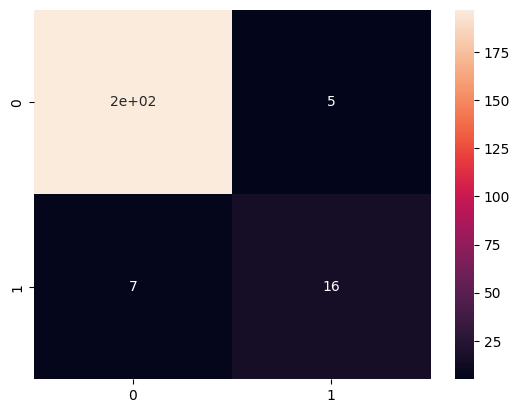

In [134]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [139]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       202
        True       0.76      0.70      0.73        23

    accuracy                           0.95       225
   macro avg       0.86      0.84      0.85       225
weighted avg       0.94      0.95      0.95       225



In [ ]:
# Step 6: Performance Tuning
# There are three methods of hyperparameter tuning in python are Grid search, Random search, and Informed search

Best Parameters: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1}
Accuracy on Test Set: 0.9422222222222222


<Axes: title={'center': 'Grid search results'}, xlabel='n_neighbors', ylabel='Mean score'>

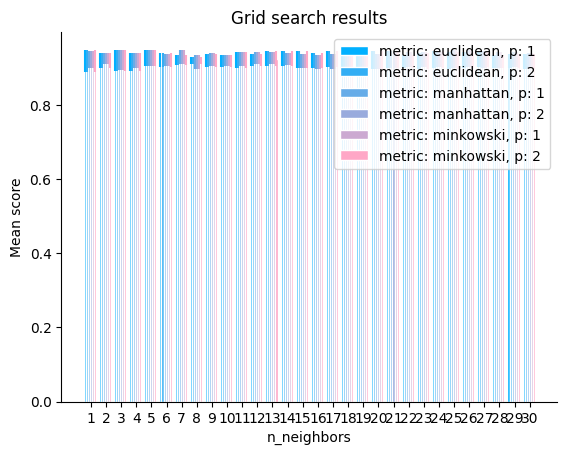

In [142]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot

# Create a KNeighborsClassifier model
model = KNeighborsClassifier()

# Define the hyperparameter grid
grid_vals = {'n_neighbors': list(range(1, 31)), 'metric': ['minkowski', 'euclidean', 'manhattan'], 'p': [1, 2]}

# Create a GridSearchCV object
grid_knn = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy', cv=6, refit=True, return_train_score=True)

# Train the model
grid_knn.fit(X_train, Y_train)

# Get the best parameters and best estimator
best_params = grid_knn.best_params_
best_estimator = grid_knn.best_estimator_

# Make predictions on the test set
preds = best_estimator.predict(X_test)

# Print the best parameters
print("Best Parameters:", best_params)

# Print the accuracy on the test set using the best estimator
print("Accuracy on Test Set:", best_estimator.score(X_test, Y_test))

# Plot grid search results
plot.grid_search(grid_knn.cv_results_, change='n_neighbors', kind='bar')


In [145]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Random Forest
model_rf = RandomForestClassifier()
grid_rf = {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy']}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=grid_rf, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_search_rf.fit(X_train, Y_train)
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
accuracy_rf = best_estimator_rf.score(X_test, Y_test)
print("Best Parameters (Random Forest):", best_params_rf)
print("Accuracy on Test Set (Random Forest):", accuracy_rf)

# Decision Tree
model_dt = DecisionTreeClassifier()
grid_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': list(range(1, 11))}
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=grid_dt, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_search_dt.fit(X_train, Y_train)
best_params_dt = grid_search_dt.best_params_
best_estimator_dt = grid_search_dt.best_estimator_
accuracy_dt = best_estimator_dt.score(X_test, Y_test)
print("Best Parameters (Decision Tree):", best_params_dt)
print("Accuracy on Test Set (Decision Tree):", accuracy_dt)

# Naive Bayes
model_nb = GaussianNB()
# Naive Bayes does not have hyperparameters to tune

# Logistic Regression
model_lr = LogisticRegression()
grid_lr = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1]}
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=grid_lr, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_search_lr.fit(X_train, Y_train)
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_
accuracy_lr = best_estimator_lr.score(X_test, Y_test)
print("Best Parameters (Logistic Regression):", best_params_lr)
print("Accuracy on Test Set (Logistic Regression):", accuracy_lr)

# Support Vector Classifier
model_svc = SVC()
grid_svc = {'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1]}
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid=grid_svc, scoring='accuracy', cv=6, refit=True, return_train_score=True)
grid_search_svc.fit(X_train, Y_train)
best_params_svc = grid_search_svc.best_params_
best_estimator_svc = grid_search_svc.best_estimator_
accuracy_svc = best_estimator_svc.score(X_test, Y_test)
print("Best Parameters (Support Vector Classifier):", best_params_svc)
print("Accuracy on Test Set (Support Vector Classifier):", accuracy_svc)


Best Parameters (Random Forest): {'criterion': 'entropy', 'n_estimators': 100}
Accuracy on Test Set (Random Forest): 0.9422222222222222
Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
Accuracy on Test Set (Decision Tree): 0.9066666666666666
Best Parameters (Logistic Regression): {'C': 1, 'penalty': 'l2'}
Accuracy on Test Set (Logistic Regression): 0.9333333333333333
Best Parameters (Support Vector Classifier): {'C': 1, 'kernel': 'rbf'}
Accuracy on Test Set (Support Vector Classifier): 0.92


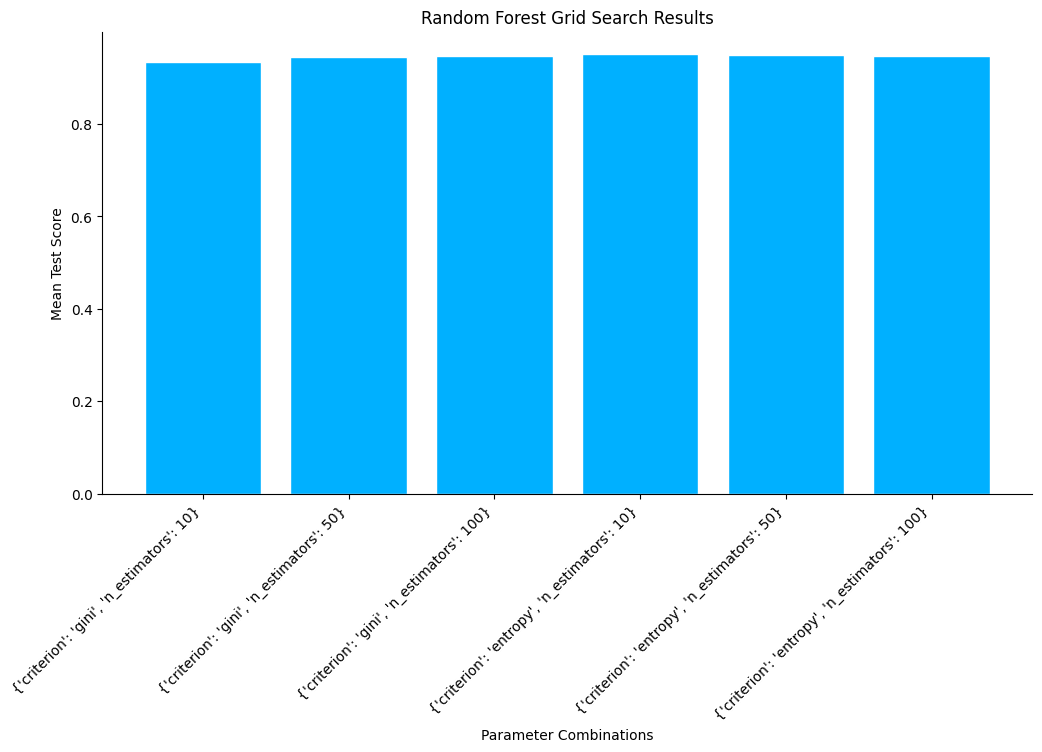

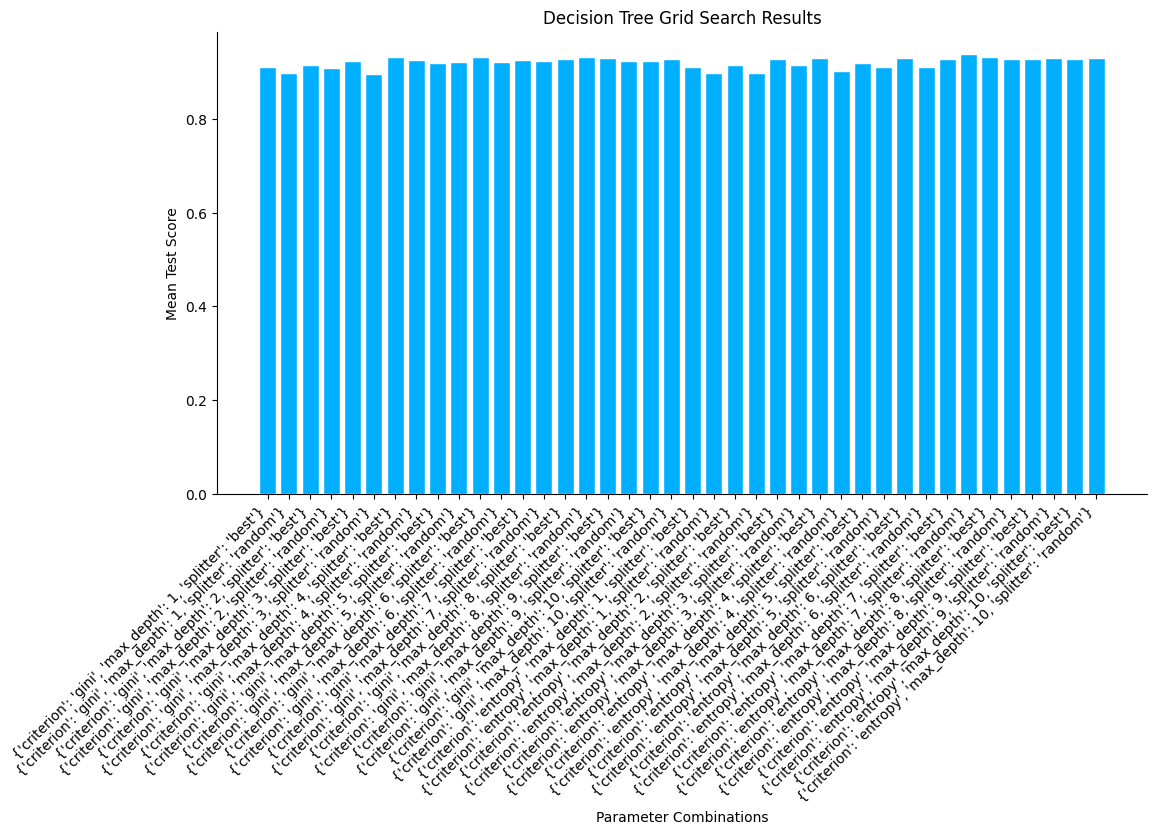

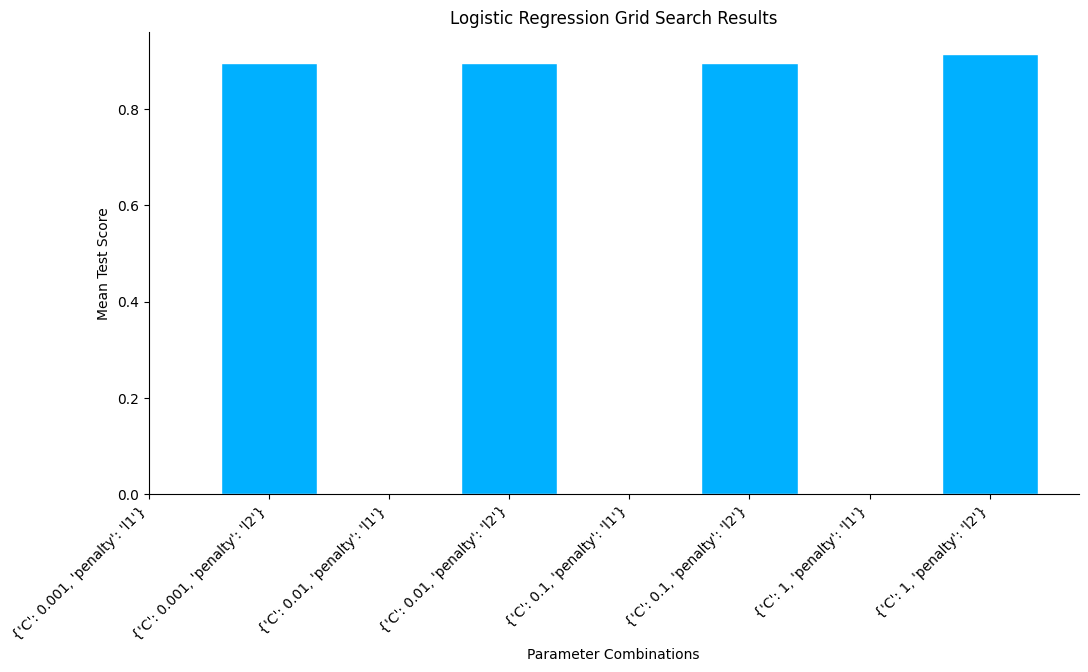

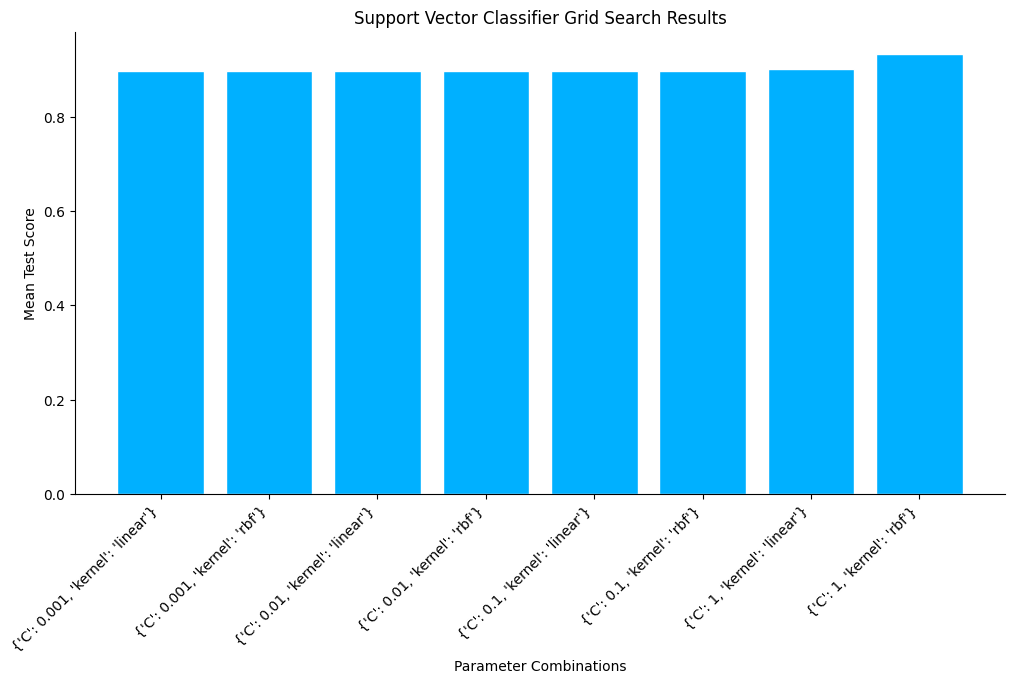

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Plot grid search results for Random Forest
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(grid_search_rf.cv_results_['params'])), grid_search_rf.cv_results_['mean_test_score'])
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Random Forest Grid Search Results')
plt.xticks(np.arange(len(grid_search_rf.cv_results_['params'])), [str(params) for params in grid_search_rf.cv_results_['params']], rotation=45, ha='right')
plt.show()

# Plot grid search results for Decision Tree
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(grid_search_dt.cv_results_['params'])), grid_search_dt.cv_results_['mean_test_score'])
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree Grid Search Results')
plt.xticks(np.arange(len(grid_search_dt.cv_results_['params'])), [str(params) for params in grid_search_dt.cv_results_['params']], rotation=45, ha='right')
plt.show()

# Plot grid search results for Logistic Regression
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(grid_search_lr.cv_results_['params'])), grid_search_lr.cv_results_['mean_test_score'])
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Logistic Regression Grid Search Results')
plt.xticks(np.arange(len(grid_search_lr.cv_results_['params'])), [str(params) for params in grid_search_lr.cv_results_['params']], rotation=45, ha='right')
plt.show()

# Plot grid search results for Support Vector Classifier
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(grid_search_svc.cv_results_['params'])), grid_search_svc.cv_results_['mean_test_score'])
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Test Score')
plt.title('Support Vector Classifier Grid Search Results')
plt.xticks(np.arange(len(grid_search_svc.cv_results_['params'])), [str(params) for params in grid_search_svc.cv_results_['params']], rotation=45, ha='right')
plt.show()


Best Parameters (K-Nearest Neighbors): {'p': 2, 'n_neighbors': 2, 'metric': 'manhattan'}
Accuracy on Test Set (K-Nearest Neighbors): 0.9377777777777778
Best Parameters (Random Forest): {'n_estimators': 50, 'max_depth': 100, 'criterion': 'gini'}
Accuracy on Test Set (Random Forest): 0.9377777777777778
Best Parameters (Decision Tree): {'splitter': 'random', 'max_depth': 10, 'criterion': 'gini'}
Accuracy on Test Set (Decision Tree): 0.9422222222222222
Best Parameters (Logistic Regression): {'penalty': 'l2', 'C': 10}
Accuracy on Test Set (Logistic Regression): 0.9288888888888889
Best Parameters (Support Vector Classifier): {'kernel': 'rbf', 'C': 10}
Accuracy on Test Set (Support Vector Classifier): 0.9244444444444444


<Axes: title={'center': 'Grid search results'}, xlabel='kernel', ylabel='Mean score'>

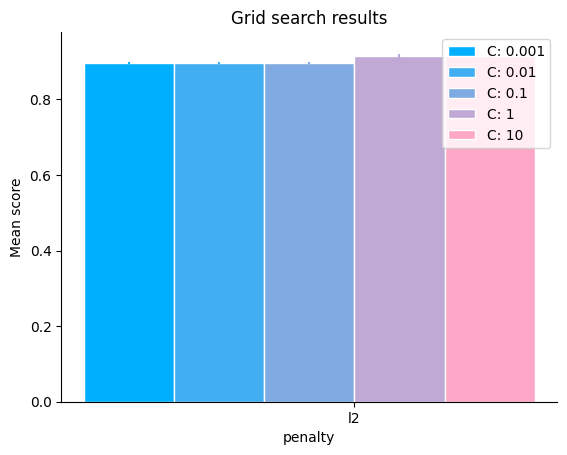

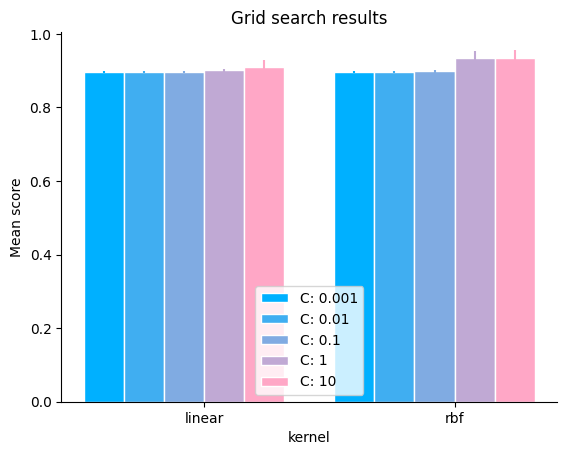

In [174]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot




# K-Nearest Neighbors
model_knn = KNeighborsClassifier()
param_knn = {'n_neighbors': list(range(1, 31)), 'metric': ['minkowski', 'euclidean', 'manhattan'], 'p': [1, 2]}
random_search_knn = RandomizedSearchCV(estimator=model_knn, param_distributions=param_knn, n_iter=10, scoring='accuracy', cv=6, refit=True, n_jobs=-1)
random_search_knn.fit(X_train, Y_train)
best_params_knn = random_search_knn.best_params_
best_estimator_knn = random_search_knn.best_estimator_
accuracy_knn = best_estimator_knn.score(X_test, Y_test)
print("Best Parameters (K-Nearest Neighbors):", best_params_knn)
print("Accuracy on Test Set (K-Nearest Neighbors):", accuracy_knn)


# Random Forest
model_rf = RandomForestClassifier()
param_rf = {'n_estimators': [10, 50, 100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 50, 100]}
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_rf, n_iter=10, scoring='accuracy', cv=6, refit=True, n_jobs=-1)
random_search_rf.fit(X_train, Y_train)
best_params_rf = random_search_rf.best_params_
best_estimator_rf = random_search_rf.best_estimator_
accuracy_rf = best_estimator_rf.score(X_test, Y_test)
print("Best Parameters (Random Forest):", best_params_rf)
print("Accuracy on Test Set (Random Forest):", accuracy_rf)

# Decision Tree
model_dt = DecisionTreeClassifier()
param_dt = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 50, 100]}
random_search_dt = RandomizedSearchCV(estimator=model_dt, param_distributions=param_dt, n_iter=10, scoring='accuracy', cv=6, refit=True, n_jobs=-1)
random_search_dt.fit(X_train, Y_train)
best_params_dt = random_search_dt.best_params_
best_estimator_dt = random_search_dt.best_estimator_
accuracy_dt = best_estimator_dt.score(X_test, Y_test)
print("Best Parameters (Decision Tree):", best_params_dt)
print("Accuracy on Test Set (Decision Tree):", accuracy_dt)

# Naive Bayes
# Naive Bayes does not have hyperparameters to tune with Randomized Search

# Logistic Regression
model_lr = LogisticRegression()
param_lr = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
random_search_lr = RandomizedSearchCV(estimator=model_lr, param_distributions=param_lr, n_iter=10, scoring='accuracy', cv=6, refit=True, n_jobs=-1)
random_search_lr.fit(X_train, Y_train)
best_params_lr = random_search_lr.best_params_
best_estimator_lr = random_search_lr.best_estimator_
accuracy_lr = best_estimator_lr.score(X_test, Y_test)
print("Best Parameters (Logistic Regression):", best_params_lr)
print("Accuracy on Test Set (Logistic Regression):", accuracy_lr)

# Support Vector Classifier
model_svc = SVC()
param_svc = {'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10]}
random_search_svc = RandomizedSearchCV(estimator=model_svc, param_distributions=param_svc, n_iter=10, scoring='accuracy', cv=6, refit=True, n_jobs=-1)
random_search_svc.fit(X_train, Y_train)
best_params_svc = random_search_svc.best_params_
best_estimator_svc = random_search_svc.best_estimator_
accuracy_svc = best_estimator_svc.score(X_test, Y_test)
print("Best Parameters (Support Vector Classifier):", best_params_svc)
print("Accuracy on Test Set (Support Vector Classifier):", accuracy_svc)

# Plot Randomized Search results for Logistic Regression
plot.grid_search(random_search_lr.cv_results_, change='penalty', kind='bar', sort=False)
# Plot Randomized Search results for Support Vector Classifier
plot.grid_search(random_search_svc.cv_results_, change='kernel', kind='bar', sort=False)



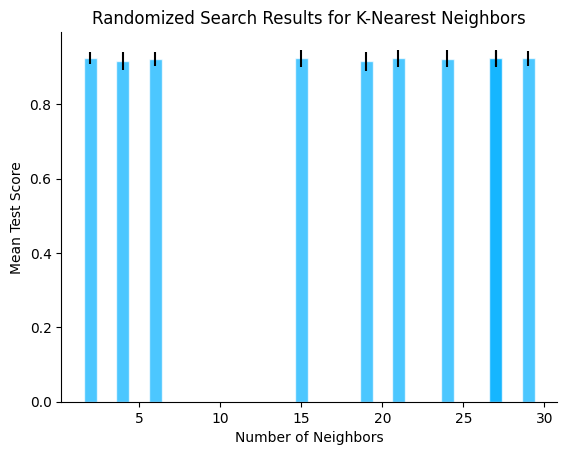

In [175]:
import matplotlib.pyplot as plt

# Extract data
param_n_neighbors = random_search_knn.cv_results_['param_n_neighbors']
mean_test_score = random_search_knn.cv_results_['mean_test_score']
std_test_score = random_search_knn.cv_results_['std_test_score']

# Plotting
plt.bar(param_n_neighbors, mean_test_score, yerr=std_test_score, align='center', alpha=0.7)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score')
plt.title('Randomized Search Results for K-Nearest Neighbors')
plt.show()


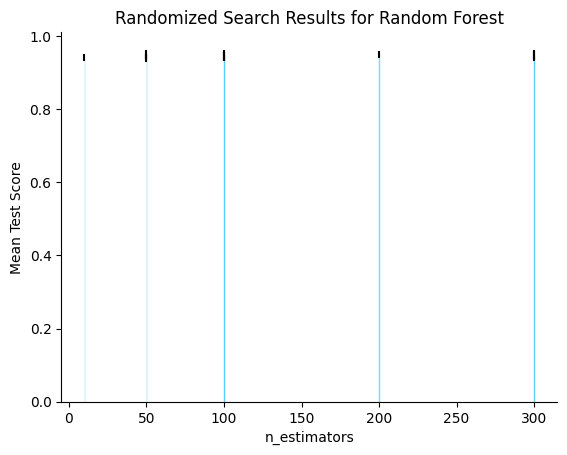

In [176]:
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant information from the grid search results
param_values = random_search_rf.cv_results_['param_n_estimators']
mean_test_scores = random_search_rf.cv_results_['mean_test_score']
std_test_scores = random_search_rf.cv_results_['std_test_score']

# Plotting
plt.bar(param_values, mean_test_scores, yerr=std_test_scores, align='center', alpha=0.7)
plt.xlabel('n_estimators')
plt.ylabel('Mean Test Score')
plt.title('Randomized Search Results for Random Forest')
plt.show()


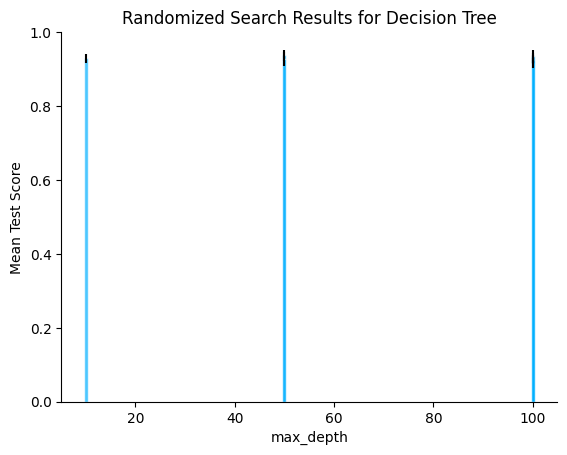

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Import pandas

# Convert x values to numeric type
param_values_dt_numeric = pd.to_numeric(param_values_dt, errors='coerce')

# Plotting for Decision Tree
plt.bar(param_values_dt_numeric, mean_test_scores_dt, yerr=std_test_scores_dt, align='center', alpha=0.7)
plt.xlabel('max_depth')
plt.ylabel('Mean Test Score')
plt.title('Randomized Search Results for Decision Tree')
plt.show()


In [1]:
#Step 7: Making Predictions
#multiple class predictions
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=3, centers=2, n_features=2, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
 print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-0.79415228  2.10495117], Predicted=0
X=[-8.25290074 -4.71455545], Predicted=1
X=[-2.18773166  3.33352125], Predicted=0


In [2]:
#single class prediction
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# fit final model
model = LogisticRegression()
model.fit(X, y)
# define one new instance
Xnew = [[-0.79415228, 2.10495117]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[-0.79415228, 2.10495117], Predicted=0
